<a href="https://colab.research.google.com/github/aNdr3W03/Eksperimen_SML_andrewbj/blob/main/preprocessing/Eksperimen_andrewbj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan dalam proyek ini adalah dataset penyakit diabetes yang berasal dari Kaggle dan dapat diakses melalui tautan berikut: https://kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows. Dataset ini terdiri dari data kesehatan dan data demografis yang mencakup 100.000 individu dan terdiri dari 17 fitur seperti jenis kelamin, umur, dan berbagai variabel penentu diabetes lainnya.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [193]:
import os
import math
import json
import collections

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

from google.colab import userdata

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [194]:
# Configure Kaggle API
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [195]:
# Dataset download
!kaggle datasets download -d ziya07/diabetes-clinical-dataset100k-rows -f diabetes_dataset_with_notes.csv

Dataset URL: https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows
License(s): CC0-1.0
diabetes_dataset_with_notes.csv: Skipping, found more recently modified local copy (use --force to force download)


In [196]:
# Data loading
df = pd.read_csv('diabetes_dataset_with_notes.csv')
print(f'Dataset dimension: {df.shape}')
df.head()

Dataset dimension: (100000, 17)


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [197]:
# Check dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Dataset ini terdiri dari 17 fitur dengan 100.000 baris data tanpa ada _missing value_, terdiri dari 10 fitur data yang bertipe bilangan bulat (_integer_), 3 fitur data bertipe bilangan desimal (_float_), dan 4 fitur data bertipe _object_ untuk merepresentasikan data kategorikal. Berikut adalah detail deskripsi untuk masing-masing fitur:

<table>
<tr>
    <th align='left'>year</th>
    <td>Tahun data diambil.</td>
</tr>
<tr>
    <th align='left'>gender</th>
    <td>Jenis kelamin pasien.</td>
</tr>
<tr>
    <th align='left'>age</th>
    <td>Umur pasien.</td>
</tr>
<tr>
    <th align='left'>location</th>
    <td>Lokasi negara bagian (<i>state</i>) pasien.</td>
</tr>
<tr>
    <th align='left'>race:AfricanAmerican</th>
    <td>Ras pasien Afrika Amerika (<i>True</i>/<i>False</i>).</td>
</tr>
<tr>
    <th align='left'>race:Asian</th>
    <td>Ras pasien Asia (<i>True</i>/<i>False</i>).</td>
</tr>
<tr>
    <th align='left'>race:Caucasian</th>
    <td>Ras pasien Kausasia (<i>True</i>/<i>False</i>).</td>
</tr>
<tr>
    <th align='left'>race:Hispanic</th>
    <td>Ras pasien Hispanik (<i>True</i>/<i>False</i>).</td>
</tr>
<tr>
    <th align='left'>race:Other</th>
    <td>Ras pasien Lainnya (<i>True</i>/<i>False</i>).</td>
</tr>
<tr>
    <th align='left'>hypertension</th>
    <td>Status hipertensi pasien (<i>True</i>/<i>False</i>).</td>
</tr>
<tr>
    <th align='left'>heart_disease</th>
    <td>Status riwayat penyakit jantung pasien (<i>True</i>/<i>False</i>).</td>
</tr>
<tr>
    <th align='left'>smoking_history</th>
    <td>Riwayat merokok pasien (<i>No Info</i>, <i>Never</i>, <i>Ever</i>, <i>Current</i>, <i>Not Current</i>, <i>Former</i>).</td>
</tr>
<tr>
    <th align='left'>bmi</th>
    <td>Indeks massa tubuh (<i>Body Mass index</i>) pasien.</td>
</tr>
<tr>
    <th align='left'>hbA1c_level</th>
    <td>Tingkat HbA1c pasien (persentase kadar gula darah rata-rata dalam beberapa bulan terakhir).</td>
</tr>
<tr>
    <th align='left'>blood_glucose_level</th>
    <td>Tingkat gula darah pasien.</td>
</tr>
<tr>
    <th align='left'>diabetes</th>
    <td>Status diabetes pasien (<i>True</i>/<i>False</i>).</td>
</tr>
<tr>
    <th align='left'>clinical_notes</th>
    <td>Catatan klinis pasien.</td>
</tr>
</table>

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Deskripsi Statistik Dataset

In [198]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,100000.0,2018.360820,1.345239,2015.00,2019.00,2019.00,2019.00,2022.00
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
race:AfricanAmerican,100000.0,0.202230,0.401665,0.00,0.00,0.00,0.00,1.00
race:Asian,100000.0,0.200150,0.400114,0.00,0.00,0.00,0.00,1.00
race:Caucasian,100000.0,0.198760,0.399069,0.00,0.00,0.00,0.00,1.00
race:Hispanic,100000.0,0.198880,0.399160,0.00,0.00,0.00,0.00,1.00
race:Other,100000.0,0.199980,0.399987,0.00,0.00,0.00,0.00,1.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69


Dari hasil statistik deskriptif untuk data numerik didapatkan analisis sebagai berikut:

<table>
<tr>
    <th align='left'>year</th>
    <td>Tahun data diambil rata-rata adalah di tahun 2018 dengan rentang tahun 2015 sampai tahun 2022.</td>
</tr>
<tr>
    <th align='left'>age</th>
    <td>Umur pasien rata-rata adalah 41 tahun dengan rentang dari umur 0 tahun hingga 80 tahun.</td>
</tr>
<tr>
    <th align='left'>race:AfricanAmerican</th>
    <td>Ras pasien rata-rata sebanyak lebih dari 20% merupakan ras Afrika Amerika.</td>
</tr>
<tr>
    <th align='left'>race:Asian</th>
    <td>Ras pasien rata-rata sebanyak lebih dari 20% merupakan ras Asia.</td>
</tr>
<tr>
    <th align='left'>race:Caucasian</th>
    <td>Ras pasien rata-rata sebanyak lebih dari 19% merupakan ras Kausasia.</td>
</tr>
<tr>
    <th align='left'>race:Hispanic</th>
    <td>Ras pasien rata-rata sebanyak lebih dari 19% merupakan ras Hispanik</td>
</tr>
<tr>
    <th align='left'>race:Other</th>
    <td>Ras pasien rata-rata sebanyak lebih dari 19% merupakan ras Lainnya.</td>
</tr>
<tr>
    <th align='left'>hypertension</th>
    <td>Rata-rata pasien yang menderita hipertensi hanya 7.5%.</td>
</tr>
<tr>
    <th align='left'>heart_disease</th>
    <td>Rata-rata pasien yang memiliki riwayat penyakit jantung hanya 3.9%.</td>
</tr>
<tr>
    <th align='left'>smoking_history</th>
    <td>Riwayat merokok pasien (<i>No Info</i>, <i>Never</i>, <i>Ever</i>, <i>Current</i>, <i>Not Current</i>, <i>Former</i>).</td>
</tr>
<tr>
    <th align='left'>bmi</th>
    <td>Indeks massa tubuh (<i>Body Mass index</i>) pasien rata-rata adalah 27 dengan rentang 10.01 hingga 95.69.</td>
</tr>
<tr>
    <th align='left'>hbA1c_level</th>
    <td>Tingkat HbA1c rata-rata pasien adalah 5.5% dengan rentang 3.5% sampai 9%.</td>
</tr>
<tr>
    <th align='left'>blood_glucose_level</th>
    <td>Tingkat gula darah rata-rata pasien adalah 138 dengan rentang dari 80 hingga 300.</td>
</tr>
<tr>
    <th align='left'>diabetes</th>
    <td>Pasien yang terkena diabetes hanya 8.5% dari keseluruhan pasien yang diperiksa.</td>
</tr>
</table>

In [199]:
df.describe(include='object').T

,count,unique,top,freq
gender,100000,3,Female,58552
location,100000,55,Kentucky,2038
smoking_history,100000,6,No Info,35816
clinical_notes,100000,761,"Overweight, advised dietary and exercise modif...",4650


Dari hasil statistik deskriptif untuk data kategorikal didapatkan analisis sebagai berikut:

<table>
<tr>
    <th align='left'>gender</th>
    <td>Terdapat 3 kategori untuk jenis kelamin pada dataset pasien.</td>
</tr>
<tr>
    <th align='left'>location</th>
    <td>Pasien berlokasi di berbagai negara bagian (<i>state</i>) sebanyak 55 negara bagian.</td>
</tr>
<tr>
    <th align='left'>smoking_history</th>
    <td>Terdapat 6 kategori riwayat merokok pasien.</th>
</tr>
<tr>
    <th align='left'>clinical_notes</th>
    <td>Catatan klinis pasien dengan nilai unik sebanyak 761 data.</th>
</tr>
</table>

## 4.2 Pemeriksaan Data Duplikat

In [200]:
# Check duplicate data
print(f'Duplicate data: {df.duplicated().sum()}')

Duplicate data: 14


Pada dataset ini ternyata memiliki 14 baris data yang duplikat dan akan dihapus pada data _data preprocessing_ untuk memastikan hasil analisis dan prediksi yang akurat.

## 4.3 Pemeriksaan Missing Value

In [201]:
# Check missing value
df.isnull().sum()

,0
year,0
gender,0
age,0
location,0
race:AfricanAmerican,0
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


Pada dataset ini tidak terdapat nilai yang kosong atau hilang (_missing value_), sehingga tidak diperlukan pemrosesan data lebih lanjut untuk menangani _missing value_ dan aman untuk dilakukan analisis lebih lanjut.

In [202]:
# Separate the numerical and categorical data
def separate_numerical_categorical(df):
    numerical = [col for col in df.columns if df[col].dtype != 'object']
    categorical = [col for col in df.columns if df[col].dtype == 'object']
    return numerical, categorical

numerical, categorical = separate_numerical_categorical(df)

## 4.4 Pemeriksaan Outliers

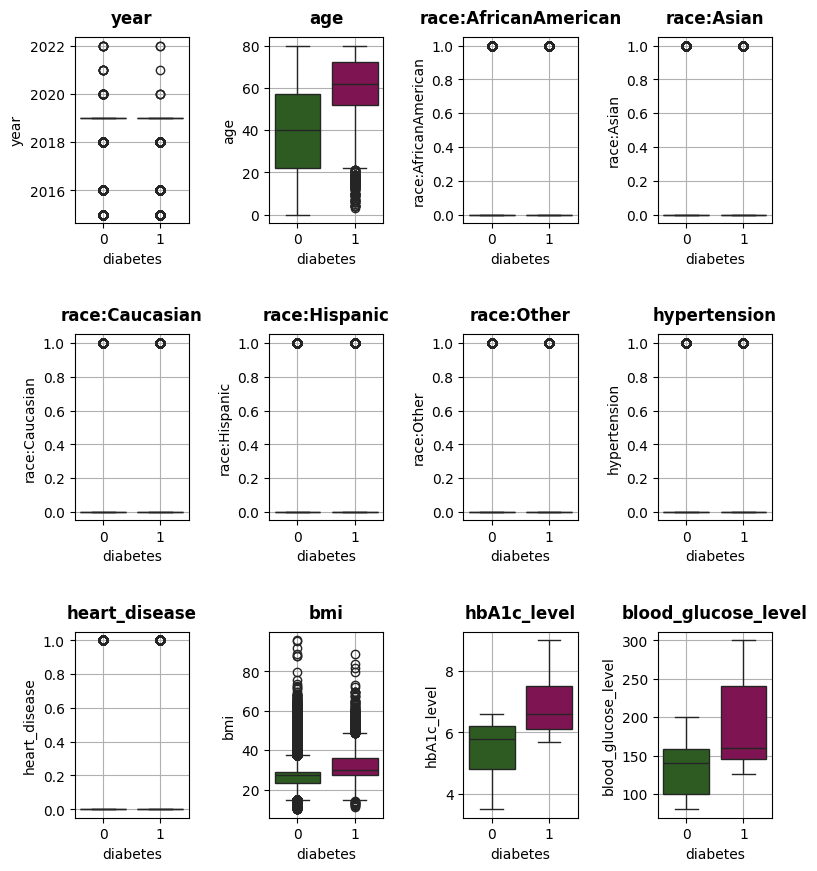

In [203]:
# @markdown Outliers Plot
# Calculate rows and columns for subplots
cols = 4
rows = math.ceil(len(numerical) / cols)

# Plot using a loop
fig, ax = plt.subplots(rows, cols, figsize=(9, 14))
ax = ax.flatten()

# Define the color palette
palette = {0: '#276419', 1: '#900254'}

for i, feature in enumerate(numerical):
    sns.boxplot(data=df, x='diabetes', y=feature, hue='diabetes',
                palette=palette, ax=ax[i], legend=False)
    ax[i].set_title(feature, fontweight='bold', pad=10)
    ax[i].grid()

# Hide any unused subplots
for j in range(i, len(ax)):
    fig.delaxes(ax[j])

plt.subplots_adjust(hspace=0.6, wspace=0.7)
plt.show()

Berdasarkan grafik boxplot di atas, didapatkan bahwa:
1. Terdapat banyak outliers pada fitur untuk data pasien yang tidak terkena diabetes, yaitu `bmi` saja.
2. Terdapat banyak outliers pada fitur untuk data pasien yang terkena diabetes, yaitu `age` dan `bmi`.
3. Terdapat beberapa outliers pada beberapa fitur untuk data pasien yang tidak terkena diabetes maupun yang terkena diabetes, yaitu `year`, semua fitur `race`, `hypertension`, dan `heart_disease`.
4. Sedangkan pada fitur `hbA1c_level` dan `blood_glucose_level` sama sekali tidak terdapat outliers baik untuk data pasien yang tidak terkena diabetes maupun yang terkena diabetes.

## 4.5 Univariate Analysis untuk Data Numerik

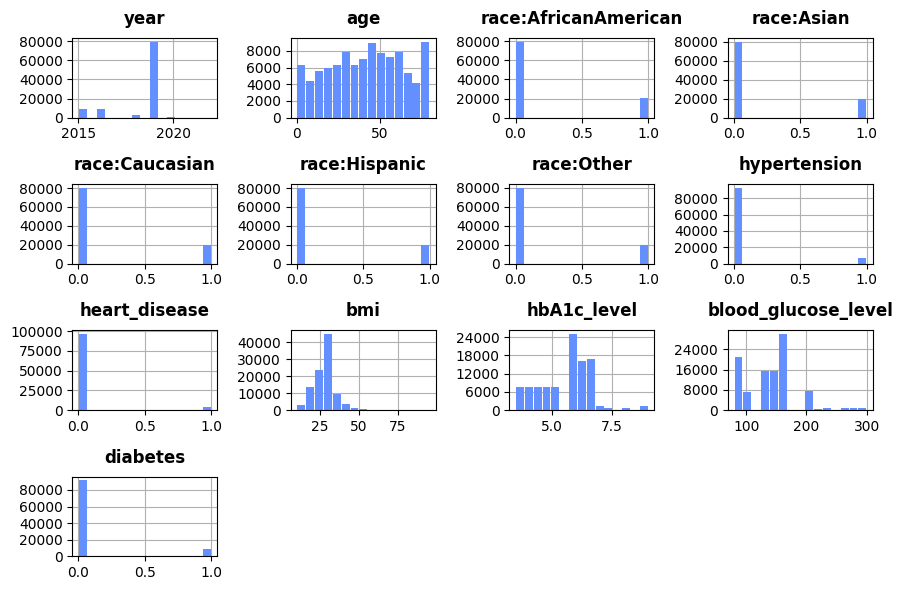

In [204]:
# @markdown Features Histogram Plot
ax = df.hist(bins=15, figsize=(9, 6), zorder=2, rwidth=0.9, color='#648fff')

for ax in ax.flatten():
    ax.set_title(ax.get_title(), fontweight='bold', pad=10)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

plt.tight_layout()
plt.show()

Berdasarkan grafik histogram untuk data numerik di atas, didapatkan bahwa:
1. `year` menunjukkan bahwa sebagian besar data berasal dari tahun 2019, menunjukkan bahwa tahun tersebut merupakan periode utama pengambilan data.
2. `age` menunjukkan distribusi usia cenderung merata dari usia muda hingga lanjut, namun terdapat peningkatan tajam pada usia sekitar 80 tahun, yang mengindikasikan jumlah pasien lansia cukup tinggi.
3. `race:AfricanAmerican`, `race:Asian`, `race:Caucasian`, `race:Hispanic`, dan `race:Other` menunjukkan distribusi sampel antar kelompok ras cukup merata, masing-masing sekitar 19.8%-20.1%, menunjukkan proporsi yang seimbang dan minim potensi bias pada model.
4. `hypertension` menunjukkan mayoritas pasien tidak memiliki riwayat hipertensi, terlihat dari dominasi nilai 0 pada variabel ini.
5. `heart_disease` menunjukkan sebagian besar pasien juga tidak memiliki riwayat penyakit jantung, sebagaimana ditunjukkan oleh dominasi nilai 0.
6. `bmi` menunjukkan sata BMI cenderung mengikuti distribusi normal, meskipun terdapat lonjakan konsentrasi pada kisaran nilai 28-30.
7. `hbA1c_level` menunjukkan nilai yang bervariasi, namun yang paling sering muncul adalah level 6, yang mengarah pada kategori prediabetes.
8. `blood_glucose_level` menunjukkan terdapat beberapa puncak nilai antara 100 hingga 150, menandakan bahwa data tidak tersebar merata dan cenderung terklaster.
9. `diabetes` menunjukkan distribusi label sangat timpang, dengan sebagian besar pasien tidak menderita diabetes (nilai 0), dan hanya sebagian kecil yang terdiagnosis diabetes (nilai 1).

## 4.6 Univariate Analysis untuk Data Kategorikal

In [205]:
# Swap the locations and smoking history index
categorical[1], categorical[2] = categorical[2], categorical[1]
categorical

['gender', 'smoking_history', 'location', 'clinical_notes']

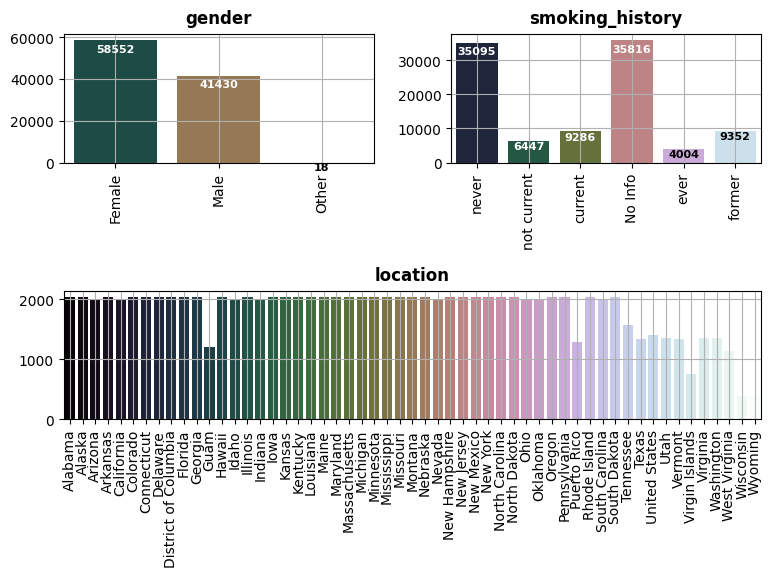

In [206]:
# @markdown Categorical Features Distribution Plot
# Create a figure with GridSpec to control subplot layout
fig = plt.figure(figsize=(9, 5))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1]) # 2 rows, 2 cols

# Axes array to store subplot references
ax = []

# First row: two side-by-side subplots
ax.append(fig.add_subplot(gs[0, 0]))  # top-left
ax.append(fig.add_subplot(gs[0, 1]))  # top-right

# Second row: one subplot spanning both columns
ax.append(fig.add_subplot(gs[1, :]))  # bottom full width

# Plot data in respective subplots
for i, feature in enumerate(categorical[:3]):
    sns.countplot(data=df, x=feature, ax=ax[i], hue=feature, palette='cubehelix')
    ax[i].set_title(feature, fontweight='bold', pad=8)
    ax[i].tick_params(axis='x')
    ax[i].tick_params(axis='y')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].grid()

    # Get unique class labels
    unique_classes = sorted(df[feature].unique())
    num_classes = len(unique_classes)

    # Logic to determine which class indexes get black font
    if num_classes == 3:
        black_indexes = [2]
    elif num_classes == 6:
        black_indexes = [4, 5]
    else:
        black_indexes = []

    if i != 2:
        # Add count labels to each bar
        for idx, bar in enumerate(ax[i].patches):
            # Bars are repeated per hue level, get the label index
            group_index = idx % num_classes
            font_color = 'black' if group_index in black_indexes else 'white'

            ax[i].annotate(
                str(int(bar.get_height())),
                (bar.get_x() + bar.get_width() / 2, bar.get_height() - (bar.get_height() * 0.03)),
                ha='center', va='top', fontsize=8, color=font_color, weight='bold'
            )

    # Rotate x labels for better readability
    for label in ax[i].get_xticklabels():
        label.set_rotation(90)

plt.subplots_adjust(hspace=1, wspace=0.25)
plt.show()

Berdasarkan grafik data kategorikal di atas, didapatkan bahwa:
1. `gender` menunjukkan sebagian besar pasien berjenis kelamin perempuan (58.7%), disusul oleh laki-laki (41.3%), sedangkan kategori Other sangat sedikit, hanya mencakup 16 orang atau 0.0% dari total data.
2. `smoking_history` menunjukkan riwayat merokok didominasi oleh kategori No Info sebanyak 38.2%, diikuti oleh pasien yang tidak pernah merokok (never) sebesar 34.5%. Sementara itu, kategori lain seperti current, former, not current, dan ever masing-masing memiliki proporsi di bawah 10%. Ini menunjukkan bahwa lebih dari separuh data berasal dari pasien yang tidak merokok atau tidak memiliki informasi lengkap terkait kebiasaan merokok.
3. `location` menunjukkan penyebaran pasien cukup merata di berbagai negara bagian di AS. Negara bagian dengan jumlah pasien terbanyak adalah Nebraska, New Jersey, dan North Dakota, masing-masing sekitar 2.1% dari total data. Sebaliknya, jumlah pasien paling sedikit terdapat di Wisconsin (hanya 2 orang atau 0.0%) dan Virgin Islands (0.9%). Hal ini mengindikasikan cakupan data yang luas, meskipun jumlah sampel bervariasi secara signifikan antar wilayah.

## 4.7 Multivariate Correlation Matrix Analysis

Text(0.5, 1.0, 'Multivariate Correlation Matrix')

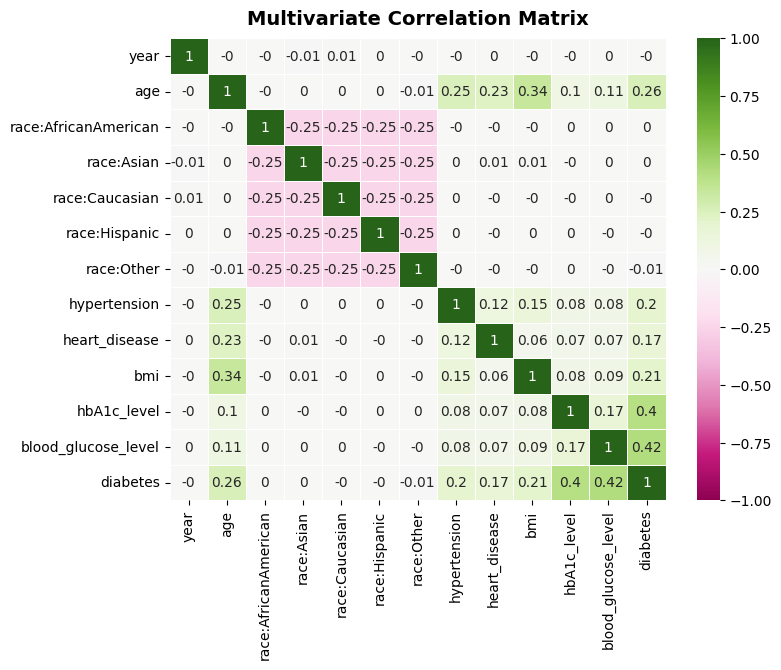

In [207]:
# @markdown Correlation Matrix Plot
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical].corr().round(2)

sns.heatmap(
    data=correlation_matrix, vmin=-1, vmax=1,
    cmap='PiYG', annot=True, linewidths=0.5
)

plt.title('Multivariate Correlation Matrix', size=14, fontweight='bold', pad=10)

Berdasarkan grafik analisis multivariat dengan correlation matrix di atas, didapatkan bahwa:
1. Rentang nilai korelasi dari -0.25 hingga 1.00, yang memiliki indikasi sebagai berikut,
    - Jika nilai korelasi mendekati 1, menunjukkan hubungan positif yang kuat antara dua fitur.
    - Jika nilai korelasi mendekati 0, menunjukkan hubungan yang rendah antara dua fitur.
    - Jika nilai korealsi mendekati -1, menunjukkan hubungan negatif yang kuat antara dua fitur.
2. Jika korelasi bernilai positif, berarti kedua fitur cenderung mengalami peningkatan secara bersamaan.
3. Jika korelasi bernilai negatif, berarti salah satu fitur cenderung meningkat ketika nilai fitur lainnya menurun.
4. Terdapat 6 fitur yang sama sekali tidak berkorelasi dengan fitur label `diabetes`, yaitu `year` dan semua fitur ras (`race:AfricanAmerican`, `race:Asian`, `race:Caucasian`, `race:Hispanic`, dan `race:Other`).
5. Terdapat 4 fitur yang berkorelasi positif rendah, yaitu `age`, `hypertension`, `heart_disease`, dan `bmi`.
6. Terdapat 2 fitur yang berkorelasi positif menengah, yaitu `hbA1c_level` dan `blood_glucose_level`.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [208]:
# Check duplicate data
print(f'Duplicate data before cleaning: {df.duplicated().sum()}')

# Drop duplicates data
df = df.drop_duplicates()
print(f'Duplicate data after cleaning: {df.duplicated().sum()}')

Duplicate data before cleaning: 14
Duplicate data after cleaning: 0


Pada dataset ini juga terdapat fitur yang dapat dikelompokkan sebelum dilakukan analisis lebih lanjut, yaitu _race_ (ras).

In [209]:
# Merge all of the race features
race_cols = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
             'race:Hispanic', 'race:Other']

race = df[race_cols].idxmax(axis=1).str.replace('race:', '')

df.insert(2, 'race', race)
df.drop(columns=race_cols, inplace=True)
df.reset_index(drop=True, inplace=True)

<ipython-input-209-9cdbf0d1ee54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=race_cols, inplace=True)


In [210]:
# Drop the clinical notes features that will not be used in this project
df.drop('clinical_notes', inplace=True, axis=1)

<ipython-input-210-98d8c825a5cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('clinical_notes', inplace=True, axis=1)


In [211]:
# Recheck the dataframe
df

,year,gender,race,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,Other,32.0,Alabama,0,0,never,27.32,5.0,100,0
1,2015,Female,Asian,29.0,Alabama,0,0,never,19.95,5.0,90,0
2,2015,Male,Other,18.0,Alabama,0,0,never,23.76,4.8,160,0
3,2015,Male,Caucasian,41.0,Alabama,0,0,never,27.32,4.0,159,0
4,2016,Female,AfricanAmerican,52.0,Alabama,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99981,2018,Female,Other,33.0,Wyoming,0,0,never,21.21,6.5,90,0
99982,2016,Female,Asian,80.0,Wyoming,0,0,No Info,36.66,5.7,100,0
99983,2018,Male,Asian,46.0,Wyoming,0,0,ever,36.12,6.2,158,0
99984,2018,Female,AfricanAmerican,51.0,Wyoming,0,0,not current,29.29,6.0,155,0


In [212]:
# Split the diabetes and non diabetes patient
df_diabet = df[df['diabetes'] == 1]
df_ndiabet = df[df['diabetes'] == 0]

df.diabetes.value_counts()

,count
diabetes,
0,91486
1,8500


In [213]:
# Rerun the seperate numerical and categorical data separation
numerical, categorical = separate_numerical_categorical(df)

In [214]:
def remove_outliers(df, numerical_cols):
    # Calculate the Q1, Q3, and IQR value
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Filter to exclude the rows that contains outliers
    outliers_filter = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) |
                        (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

    # Apply the outliers filter
    return df[outliers_filter]

In [215]:
# Check shapes before outliers removal
print('Before Outliers Removal')
print(f'Diabetes     : {df_diabet.shape}')
print(f'Non Diabetes : {df_ndiabet.shape}')

# Apply the outliers removal
df_diabet = remove_outliers(df_diabet, numerical)
df_ndiabet = remove_outliers(df_ndiabet, numerical)

# Check shapes after outliers removal
print('\nAfter Outliers Removal')
print(f'Diabetes     : {df_diabet.shape}')
print(f'Non Diabetes : {df_ndiabet.shape}')

Before Outliers Removal
Diabetes     : (8500, 12)
Non Diabetes : (91486, 12)

After Outliers Removal
Diabetes     : (4106, 12)
Non Diabetes : (62300, 12)


In [216]:
# Concat the splitted dataframe to the original dataframe
df = pd.concat([df_diabet, df_ndiabet])
df = df.reset_index(drop=True)

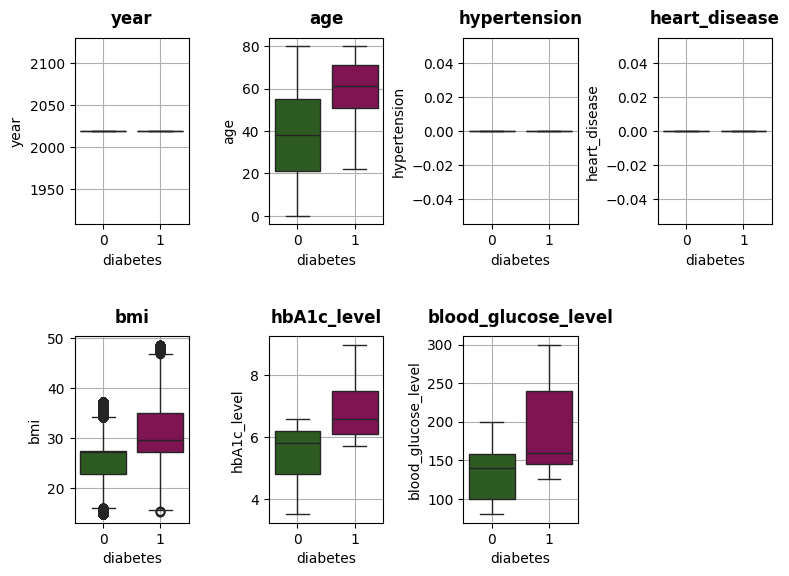

In [217]:
# @markdown Outliers Plot
# Calculate rows and columns for subplots
cols = 4
rows = math.ceil(len(numerical) / cols)

# Plot using a loop
fig, ax = plt.subplots(rows, cols, figsize=(9, 6.3))
ax = ax.flatten()

# Define the color palette
palette = {0: '#276419', 1: '#900254'}

for i, feature in enumerate(numerical):
    sns.boxplot(data=df, x='diabetes', y=feature, hue='diabetes',
                palette=palette, ax=ax[i], legend=False)
    ax[i].set_title(feature, fontweight='bold', pad=10)
    ax[i].grid()

# Hide any unused subplots
for j in range(i, len(ax)):
    fig.delaxes(ax[j])

plt.subplots_adjust(hspace=0.6, wspace=0.7)
plt.show()

In [218]:
# Encode all the categorical features
# with pd.option_context('future.no_silent_downcasting', True):
df.replace({
    'gender': {'Male': 0, 'Female': 1, 'Other': 2},
    'race': {
        'AfricanAmerican': 0, 'Asian': 1,
        'Caucasian': 2, 'Hispanic': 3, 'Other': 4,
    },
    'location': {
        'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3,
        'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7,
        'District of Columbia': 8, 'Florida': 9, 'Georgia': 10, 'Guam': 11,
        'Hawaii': 12, 'Idaho': 13, 'Illinois': 14, 'Indiana': 15, 'Iowa': 16,
        'Kansas': 17, 'Kentucky': 18, 'Louisiana': 19, 'Maine': 20,
        'Maryland': 21, 'Massachusetts': 22, 'Michigan': 23, 'Minnesota': 24,
        'Mississippi': 25, 'Missouri': 26, 'Montana': 27, 'Nebraska': 28,
        'Nevada': 29, 'New Hampshire': 30, 'New Jersey': 31, 'New Mexico': 32,
        'New York': 33, 'North Carolina': 34, 'North Dakota': 35, 'Ohio': 36,
        'Oklahoma': 37, 'Oregon': 38, 'Pennsylvania': 39, 'Puerto Rico': 40,
        'Rhode Island': 41, 'South Carolina': 42, 'South Dakota': 43,
        'Tennessee': 44, 'Texas': 45, 'United States': 46, 'Utah': 47,
        'Vermont': 48, 'Virgin Islands': 49, 'Virginia': 50,
        'Washington': 51, 'West Virginia': 52, 'Wisconsin': 53,
    },
    'smoking_history': {
        'No Info': 0, 'never': 1, 'ever': 2,
        'current': 3, 'not current': 4, 'former': 5,
    },
}, inplace=True)

In [219]:
# Recheck the dataframe
df

,year,gender,race,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2019,1,2,69.0,0,0,0,0,29.24,6.6,159,1
1,2019,0,3,26.0,0,0,0,1,27.89,8.2,140,1
2,2019,1,3,80.0,0,0,0,5,31.59,8.8,145,1
3,2019,0,2,59.0,0,0,0,1,31.82,6.8,200,1
4,2019,1,4,40.0,0,0,0,1,33.46,6.1,260,1
...,...,...,...,...,...,...,...,...,...,...,...,...
66401,2019,0,1,16.0,52,0,0,1,20.14,3.5,159,0
66402,2019,1,4,38.0,52,0,0,4,23.58,4.8,85,0
66403,2019,0,1,66.0,52,0,0,5,27.83,5.7,155,0
66404,2019,1,0,8.0,53,0,0,0,27.32,6.1,80,0


In [220]:
# Split the independent variable (X) and dependent variable/label (y)
# Drop year and race features as they don't give strong correlation to diabetes
X = df.drop(['diabetes', 'year', 'race'], axis=1)
y = df['diabetes']

In [221]:
# Check the amount of data each label
collections.Counter(y)

Counter({1: 4106, 0: 62300})

In [222]:
# Apply the over-undersampling method to overcome the imbalanced data
smoteenn = SMOTEENN(sampling_strategy='all', random_state=20250531)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y)

In [223]:
# Compare the data amoount for different methods
y_counter = collections.Counter(y)
y_smoteenn_counter = collections.Counter(y_smoteenn)

counter_total = {
    'None': y_counter.total(),
    'SMOTEENN': y_smoteenn_counter.total(),
}

data_distribution = pd.DataFrame({
    'None': (y_counter),
    'SMOTEENN': (y_smoteenn_counter),
})

total_distribution = pd.concat([
    data_distribution,
    pd.Series(counter_total, name='total').to_frame().T
])
total_distribution

,None,SMOTEENN
1,4106,61054
0,62300,55376
total,66406,116430


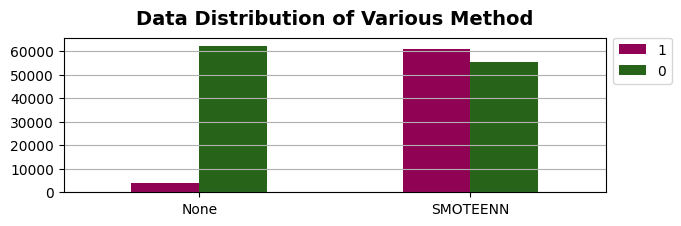

In [224]:
# Plot the data distributions
ax = data_distribution.T.plot(kind='bar', figsize=(7, 2), color=['#900254', '#276419'])

plt.title('Data Distribution of Various Method', fontsize=14, fontweight='bold', pad=10)
plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 62000, 10000))  # 0 to 62k, step of 10k
plt.grid(axis='y')
plt.show()

In [225]:
# Train-test split data
X_tr, X_ts, y_tr, y_ts = train_test_split(
    X, y, test_size=0.8, random_state=20250531, stratify=y
)

X_tr_smoteenn, X_ts_smoteenn, y_tr_smoteenn, y_ts_smoteenn = train_test_split(
    X_smoteenn, y_smoteenn, test_size=0.2, random_state=20250531, stratify=y_smoteenn
)

In [226]:
# Check the train-test split data distribution
pd.DataFrame({
    'None': (X_tr.shape, X_ts.shape,
             y_tr.shape, y_ts.shape),
    'SMOTEENN': (X_tr_smoteenn.shape, X_ts_smoteenn.shape,
                 y_tr_smoteenn.shape, y_ts_smoteenn.shape),
}, index=('X_train', 'X_test', 'y_train', 'y_test'))

,None,SMOTEENN
X_train,"(13281, 9)","(93144, 9)"
X_test,"(53125, 9)","(23286, 9)"
y_train,"(13281,)","(93144,)"
y_test,"(53125,)","(23286,)"


In [227]:
# Normalize the data
def normalize_data(data_train, data_test):
    scaler = MinMaxScaler()

    data_train = scaler.fit_transform(data_train)
    data_test = scaler.transform(data_test)

    return data_train, data_test

X_tr, X_ts = normalize_data(X_tr, X_ts)
X_tr_smoteenn, X_ts_smoteenn = normalize_data(X_tr_smoteenn, X_ts_smoteenn)

---
---
---

In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN

def remove_outliers(df, numerical_cols):
    """
    Removes rows containing outliers from a DataFrame based on the IQR method.

    Parameters:
    - df (pd.DataFrame): Input dataframe.
    - numerical_cols (List[str]): List of numerical columns to check for outliers.

    Returns:
    - pd.DataFrame: DataFrame without rows containing outliers in the specified columns.
    """

    # Calculate the Q1, Q3, and IQR value
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Filter to exclude the rows that contains outliers
    outliers_filter = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) |
                        (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

    # Apply the outliers filter
    return df[outliers_filter]

def preprocess_data(input_path, output_path):
    """
    Preprocesses the patient dataset by cleaning, encoding, removing outliers,
    and handling class imbalance using SMOTEENN. Saves the processed data to a CSV file.

    Parameters:
    - input_path (str): Path to the input CSV file.
    - output_path (str): Path to save the cleaned output CSV file.

    Returns:
    - X_train (np.ndarray): Normalized training features.
    - X_test (np.ndarray): Normalized test features.
    - y_train (pd.Series): Training labels.
    - y_test (pd.Series): Test labels.
    """

    # Load the data
    df = pd.read_csv(input_path)
    print(f'Data successfully loaded from: {input_path}')

    # Drop duplicates data
    df = df.drop_duplicates()
    if df.empty:
        raise ValueError('Dataset is empty after removing duplicates.')
    else:
        print(f'Duplicate data after cleaning: {df.duplicated().sum()}')

    # Merge all of the race features
    race_cols = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian',
                'race:Hispanic', 'race:Other']
    race = df[race_cols].idxmax(axis=1).str.replace('race:', '')
    df.insert(2, 'race', race)
    df.drop(columns=race_cols, inplace=True)

    # Drop the clinical notes features that will not be used in this project
    df.drop('clinical_notes', inplace=True, axis=1)

    # Split the diabetes and non diabetes patient
    df_diabet = df[df['diabetes'] == 1]
    df_ndiabet = df[df['diabetes'] == 0]

    # Separate the numerical and categorical data
    numerical = [col for col in df.columns if df[col].dtype != 'object']
    categorical = [col for col in df.columns if df[col].dtype == 'object']

    # Apply the outliers removal
    df_diabet = remove_outliers(df_diabet, numerical)
    df_ndiabet = remove_outliers(df_ndiabet, numerical)

    # Concat the splitted dataframe to the original dataframe
    df = pd.concat([df_diabet, df_ndiabet])
    if df.empty:
        raise ValueError('Dataset is empty after outliers handling.')

    # Encode all the categorical features
    # with pd.option_context('future.no_silent_downcasting', True):
    df.replace({
        'gender': {'Male': 0, 'Female': 1, 'Other': 2},
        'race': {
            'AfricanAmerican': 0, 'Asian': 1,
            'Caucasian': 2, 'Hispanic': 3, 'Other': 4,
        },
        'location': {
            'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3,
            'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7,
            'District of Columbia': 8, 'Florida': 9, 'Georgia': 10, 'Guam': 11,
            'Hawaii': 12, 'Idaho': 13, 'Illinois': 14, 'Indiana': 15, 'Iowa': 16,
            'Kansas': 17, 'Kentucky': 18, 'Louisiana': 19, 'Maine': 20,
            'Maryland': 21, 'Massachusetts': 22, 'Michigan': 23, 'Minnesota': 24,
            'Mississippi': 25, 'Missouri': 26, 'Montana': 27, 'Nebraska': 28,
            'Nevada': 29, 'New Hampshire': 30, 'New Jersey': 31, 'New Mexico': 32,
            'New York': 33, 'North Carolina': 34, 'North Dakota': 35, 'Ohio': 36,
            'Oklahoma': 37, 'Oregon': 38, 'Pennsylvania': 39, 'Puerto Rico': 40,
            'Rhode Island': 41, 'South Carolina': 42, 'South Dakota': 43,
            'Tennessee': 44, 'Texas': 45, 'United States': 46, 'Utah': 47,
            'Vermont': 48, 'Virgin Islands': 49, 'Virginia': 50,
            'Washington': 51, 'West Virginia': 52, 'Wisconsin': 53,
        },
        'smoking_history': {
            'No Info': 0, 'never': 1, 'ever': 2,
            'current': 3, 'not current': 4, 'former': 5,
        },
    }, inplace=True)

    # Split the independent variable (X) and dependent variable/label (y)
    # Drop year and race features as they don't give strong correlation to diabetes
    X = df.drop(['diabetes', 'year', 'race'], axis=1)
    y = df['diabetes']

    # Apply the over-undersampling method to overcome the imbalanced data
    smoteenn = SMOTEENN(sampling_strategy='all', random_state=20250531)
    X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y)

    # Train-test split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_smoteenn, y_smoteenn, test_size=0.2, random_state=20250531, stratify=y_smoteenn
    )

    # Normalize the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Save the cleaned data to a csv file
    preproc_data = pd.DataFrame(X_train, columns=X.columns.tolist())
    preproc_data['diabetes'] = y_train.reset_index(drop=True)
    preproc_data.to_csv(output_path, index=False)

    print(f'Pre-processed data successfully saved to: {output_path}\n')
    preproc_data.info()

    return X_train, X_test, y_train, y_test

In [236]:
X_train, X_test, y_train, y_test = preprocess_data(
    '/content/diabetes_dataset_with_notes.csv',
    'diabetes_processed.csv'
)

Data successfully loaded from: /content/diabetes_dataset_with_notes.csv
Duplicate data after cleaning: 0
Pre-processed data successfully saved to: diabetes_processed.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93144 entries, 0 to 93143
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               93144 non-null  float64
 1   age                  93144 non-null  float64
 2   location             93144 non-null  float64
 3   hypertension         93144 non-null  float64
 4   heart_disease        93144 non-null  float64
 5   smoking_history      93144 non-null  float64
 6   bmi                  93144 non-null  float64
 7   hbA1c_level          93144 non-null  float64
 8   blood_glucose_level  93144 non-null  float64
 9   diabetes             93144 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.1 MB


In [237]:
pd.read_csv('diabetes_processed.csv')

,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,0.028267,0.522402,0.023135,0.0,0.0,0.622614,0.762139,0.425377,0.290909,1
1,0.500000,0.274274,0.584906,0.0,0.0,0.200000,0.368995,0.400000,0.272727,0
2,0.500000,0.687357,0.791685,0.0,0.0,0.397286,0.580539,0.637597,0.222727,1
3,0.500000,0.724725,0.150943,0.0,0.0,0.000000,0.368995,0.000000,0.363636,0
4,0.000000,0.061562,0.150943,0.0,0.0,0.000000,0.068966,0.454545,0.209091,0
...,...,...,...,...,...,...,...,...,...,...
93139,0.500000,0.637137,0.000000,0.0,0.0,0.200000,0.201297,0.090909,0.295455,0
93140,0.500000,0.261762,0.433962,0.0,0.0,0.000000,0.147657,0.272727,0.340909,0
93141,0.500000,0.787287,0.150943,0.0,0.0,0.800000,0.368995,0.272727,0.363636,0
93142,0.500000,0.274274,0.811321,0.0,0.0,0.000000,0.368995,0.545455,0.209091,0


---